<a href="https://colab.research.google.com/github/GalaRusina/Proyecto_Clasificacion_Churn-Modeling/blob/main/Proyecto_Modelo_de_Clasificaci%C3%B3n_Churn_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Modelo de Clasificación - Churn Modeling  

En este proyecto voy a predecir con la ayuda de los modelos de clasificación de ML la fuga de los clientes de un banco  

Datos utilizados
https://www.kaggle.com/datasets/shubh0799/churn-modelling

https://drive.google.com/file/d/1oFV21modfXNMhYE8sK4BDpKT_Pe77PjU/view?usp=share_link


##Cargamos los datos


In [137]:
! gdown --id 1oFV21modfXNMhYE8sK4BDpKT_Pe77PjU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oFV21modfXNMhYE8sK4BDpKT_Pe77PjU
To: /content/Churn Modelling.zip
100% 268k/268k [00:00<00:00, 112MB/s]


In [138]:
import pandas as pd

In [139]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('/content/Churn Modelling.zip')

In [141]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [142]:
df.shape #el tamaño de dataset

(10000, 14)

Df tiene 14 features y 10000 muestras

In [143]:
df.info() #aqui vemos el tipo de datos de cada columna y tambien los datos no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [144]:
round((df.describe().T),2) #aqui exploremos las variables numericas y sus datos estadisticos

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48


Miramos los valores unicos que puede tomar cada variable:

In [145]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [146]:
for col in df.columns:
  print(col, "DISTRIBUCIÓN")
  print(df[col].value_counts())
  print()

RowNumber DISTRIBUCIÓN
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64

CustomerId DISTRIBUCIÓN
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

Surname DISTRIBUCIÓN
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

CreditScore DISTRIBUCIÓN
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

Geography DISTRIBUCIÓN
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Gender DISTRIBUCIÓN
Male      5457
Female    4543
Name: Gender

Podemos llegar a conclusión que las variables de columnas 'Geography', 'Gender' son las variables **categoriales**,  
variables 'Tenure', 'NumOfProduct', 'HasCard', 'IsActiveMember' son variables **discretas**  
y 'CreditScore', 'Age', 'Balance', 'EstimatedSalary' son variables **continuas**



In [147]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

df no tiene datos nulos, no hace falta tratarlos

'Exited' es nuestro target

In [148]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [149]:
df['Exited'].value_counts(normalize=True) #vemos los valores que puede tomar nuestro target y el procentaje de muestras para cada valor

0    0.7963
1    0.2037
Name: Exited, dtype: float64

**Tenemos un dataset no balanceado, vamos a tratarlo mas adelante.**

**Podemos excluir las columnas de 'RowNumber', 'CustomerId' y 'Surname' del nuestro dataset ya que no van a aportar ningún valor a nuestro modelo.**

---



In [150]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [151]:
df.shape

(10000, 11)

###Analisis de features

 Variables categoricas

In [152]:
cat_discont_features = df[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]


In [153]:
palette_features = ['#E68783', '#403396']

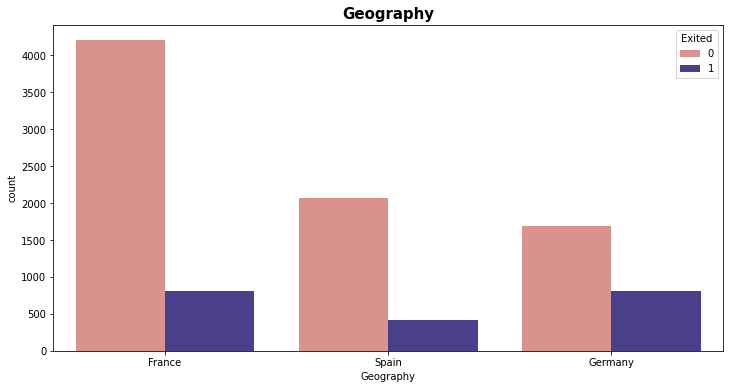

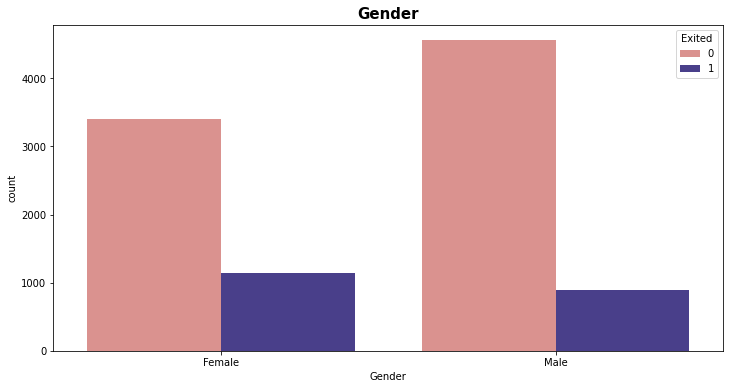

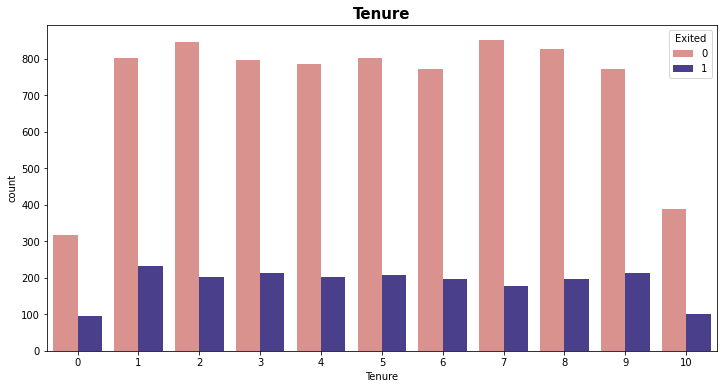

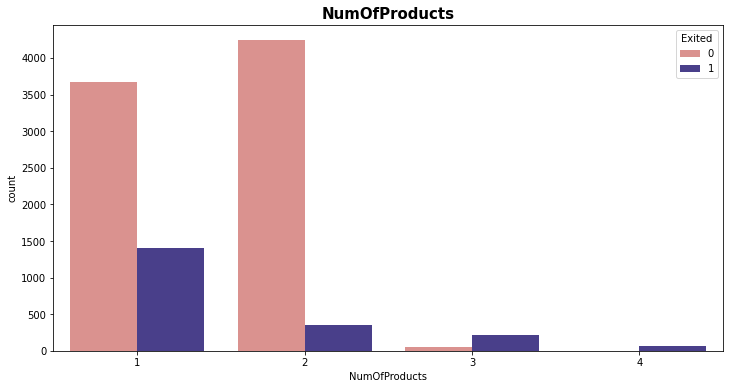

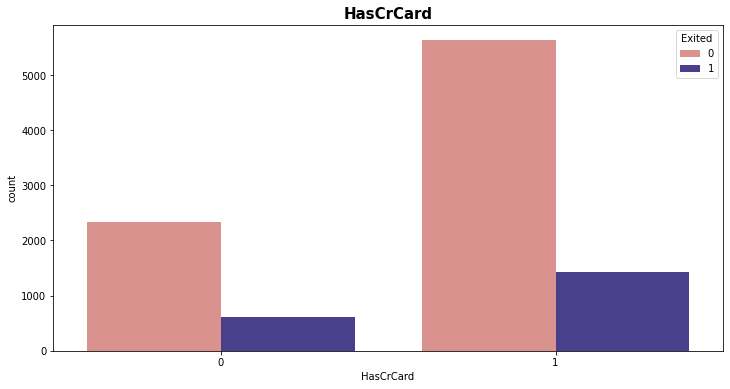

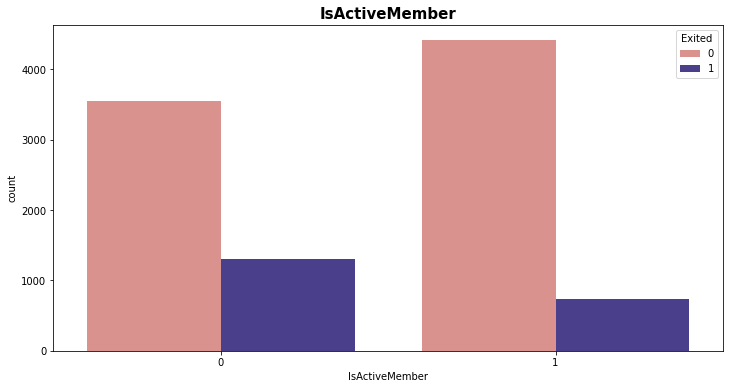

In [154]:
for feature in cat_discont_features:
    plt.figure(figsize=(12,6)) 
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.countplot(x = cat_discont_features[feature], hue = 'Exited', data = df, palette=palette_features)

###miramos las variables numericas

In [155]:
num_features = df.select_dtypes(include = ["number"])

In [156]:
num_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [157]:
round((df.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


<Figure size 1440x1152 with 0 Axes>

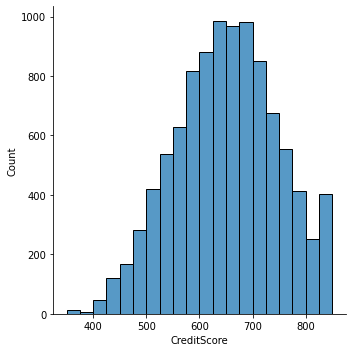

<Figure size 1440x1152 with 0 Axes>

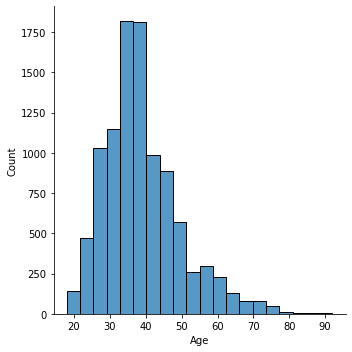

<Figure size 1440x1152 with 0 Axes>

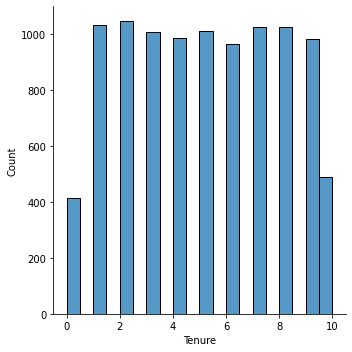

<Figure size 1440x1152 with 0 Axes>

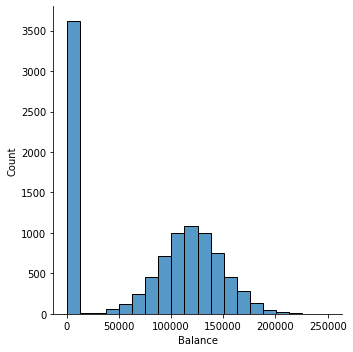

<Figure size 1440x1152 with 0 Axes>

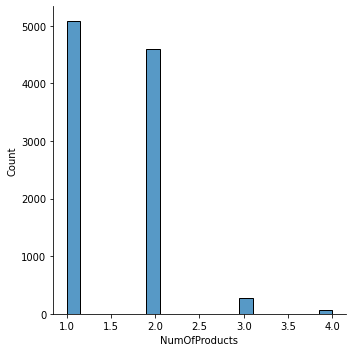

<Figure size 1440x1152 with 0 Axes>

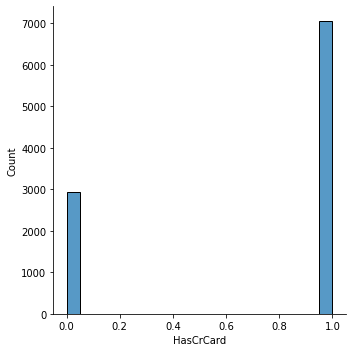

<Figure size 1440x1152 with 0 Axes>

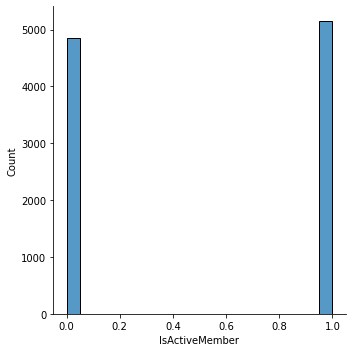

<Figure size 1440x1152 with 0 Axes>

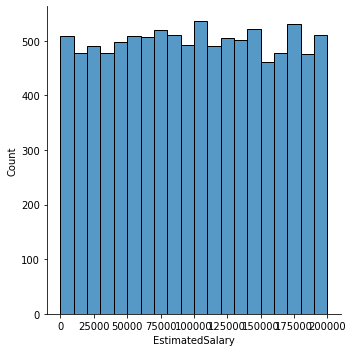

<Figure size 1440x1152 with 0 Axes>

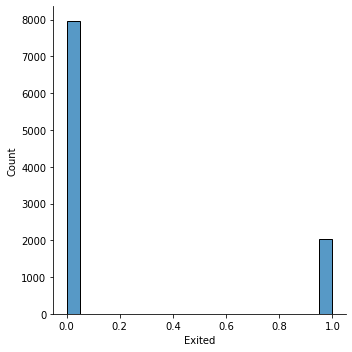

In [158]:
for feature in num_features:
  plt.figure(figsize=(20, 16))
  sns.displot(num_features[feature], bins=20)
  plt.show()

In [159]:
df.duplicated().sum() #no hay datos duplicados

0

###detección de outliers  


In [160]:
cont_features = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
cont_features

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10
...,...,...,...,...
9995,771,39,0.00,96270.64
9996,516,35,57369.61,101699.77
9997,709,36,0.00,42085.58
9998,772,42,75075.31,92888.52


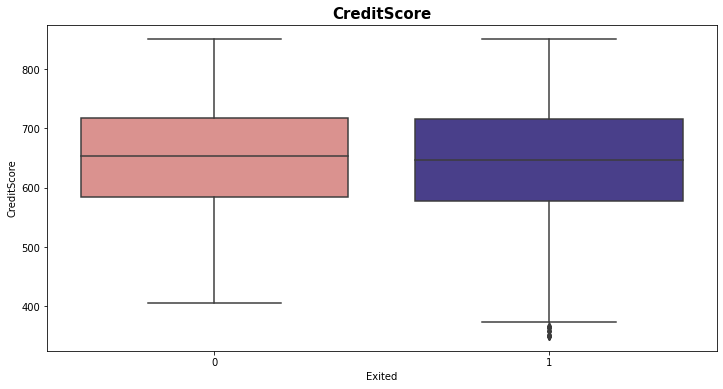

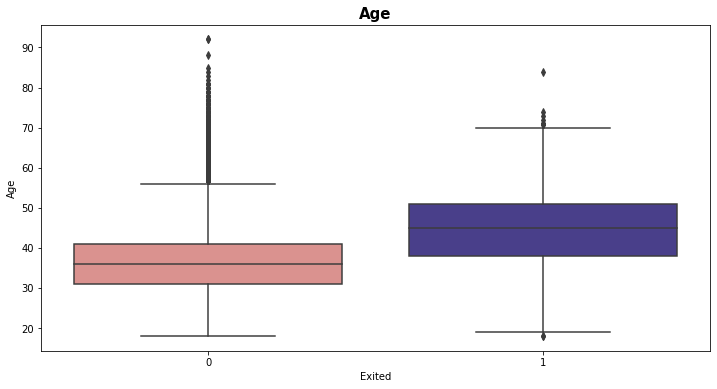

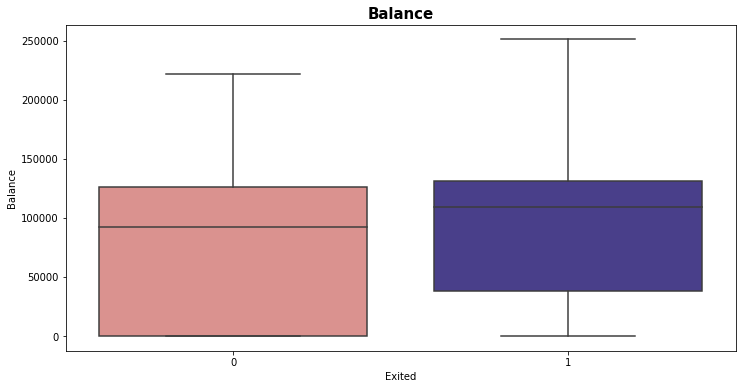

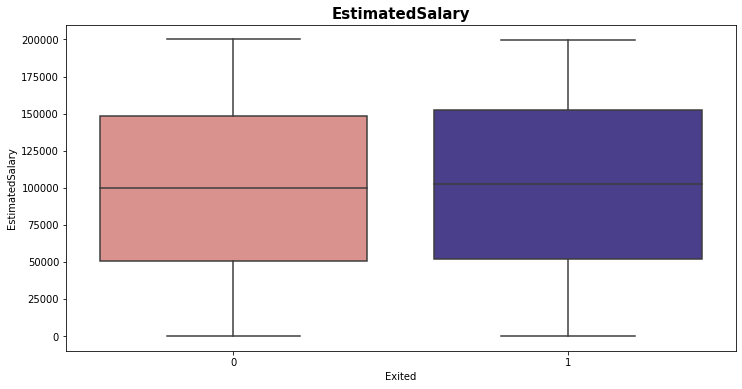

In [161]:
for feature in cont_features:
  plt.figure(figsize=(12,6)) 
  plt.title(feature, fontsize=15, fontweight='bold', ha='center')
  ax = sns.boxplot(x = df['Exited'], y = cont_features[feature], data = df, palette=palette_features)
  #add labels to each bar
for container in ax.containers:
  ax.bar_label(container)
plt.show()

Vemos que 'CreditScore' y 'Age' tienen los valores atipicos.

---

Vamos a crear la función para filtrarlos y eliminarlos posteriormente


In [162]:
def encontrar_valores_atipicos(df,var,rango):
  IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
    
  lower_boundry = df[var].quantile(0.25) - (IQR * rango)
  upper_boundry = df[var].quantile(0.75) + (IQR * rango)
    
  return lower_boundry, upper_boundry


In [163]:
limite_inf_edad, limite_sup_edad = encontrar_valores_atipicos(df,'Age',1.5)
limite_inf_edad, limite_sup_edad

(14.0, 62.0)

In [164]:
outliners_edad = df[df['Age'] > limite_sup_edad]

In [165]:
len(outliners_edad) / len(df) *100 #procentaje de datos afectados

3.5900000000000003

In [166]:
df = df.drop(df[df['Age']>limite_sup_edad].index)

In [167]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


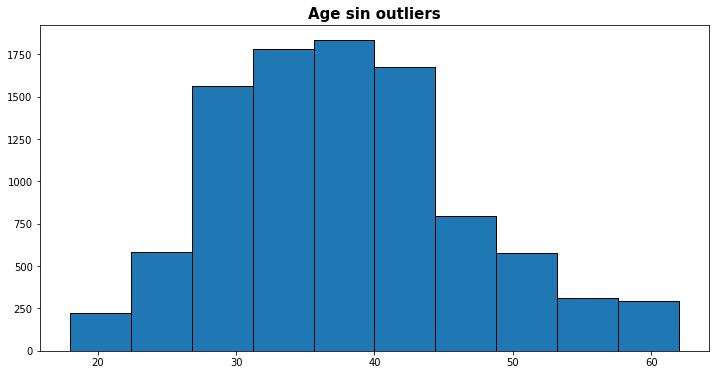

In [168]:
plt.figure(figsize=(12,6)) 
plt.title('Age sin outliers', fontsize=15, fontweight='bold', ha='center')
ax = plt.hist(df['Age'], edgecolor = 'black', linewidth = 1)


In [169]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [170]:
limite_inf_credit, limite_sup_credit = encontrar_valores_atipicos(df,'CreditScore',1.5)
limite_inf_credit, limite_sup_credit

(382.0, 918.0)

In [171]:
outliners_credit = (df[df['CreditScore'] > limite_sup_credit]) & (df[df['CreditScore'] < limite_inf_credit])

In [172]:
len(outliners_credit) / len(df) *100 #procentaje de datos afectados

0.14521315216263872

In [173]:
len(df)

9641

In [174]:
df = df.drop((df[df['CreditScore']<limite_inf_credit]).index)

In [175]:
len(df)

9627

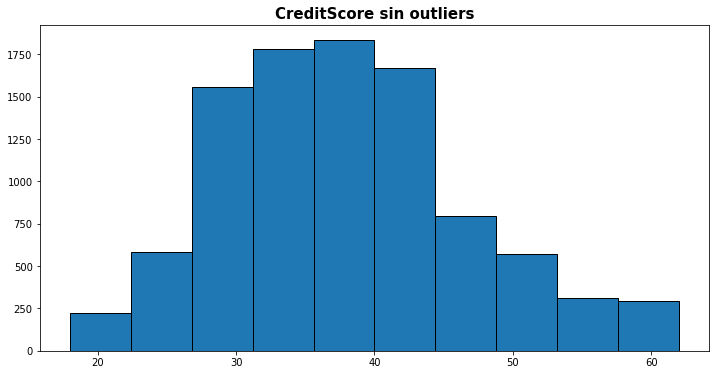

In [176]:
plt.figure(figsize=(12,6)) 
plt.title('CreditScore sin outliers', fontsize=15, fontweight='bold', ha='center')
ax = plt.hist(df['Age'], edgecolor = 'black', linewidth = 1)

##Conclusiones:
1. clientes de Alemania dejan el banco con mayor frecuencia
2. Las mujeres dejan el banco mas que los hombres.
3. El numero de  productos influe mucho: mas de tercio de los clientes que tienen un producto dejan el banco y para clientes que tienen 3 y 4 productos casi tosos lo dejaron.
4. Los clientes que tienen la tarjeta de crédito dejan el banco mas. 
5. Los miembros acrivos suelen dejar el banco menos que los inactivos.

##Correlación entre las variables:

In [177]:
corr_matrix = df.corr(method='pearson')
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.012991,-0.000294,0.007582,0.011814,-0.001101,0.020118,0.002206,-0.016979
Age,-0.012991,1.000000,-0.010538,0.041434,-0.032452,-0.016376,0.017816,-0.005630,0.358378
Tenure,-0.000294,-0.010538,1.000000,-0.012700,0.015211,0.019661,-0.027409,0.009779,-0.013226
Balance,0.007582,0.041434,-0.012700,1.000000,-0.304193,-0.013876,-0.007084,0.010063,0.116627
NumOfProducts,0.011814,-0.032452,0.015211,-0.304193,1.000000,0.002652,0.011154,0.013427,-0.050845
HasCrCard,-0.001101,-0.016376,0.019661,-0.013876,0.002652,1.000000,-0.012219,-0.010165,-0.008355
IsActiveMember,0.020118,0.017816,-0.027409,-0.007084,0.011154,-0.012219,1.000000,-0.010165,-0.143182
EstimatedSalary,0.002206,-0.005630,0.009779,0.010063,0.013427,-0.010165,-0.010165,1.000000,0.009405
Exited,-0.016979,0.358378,-0.013226,0.116627,-0.050845,-0.008355,-0.143182,0.009405,1.000000


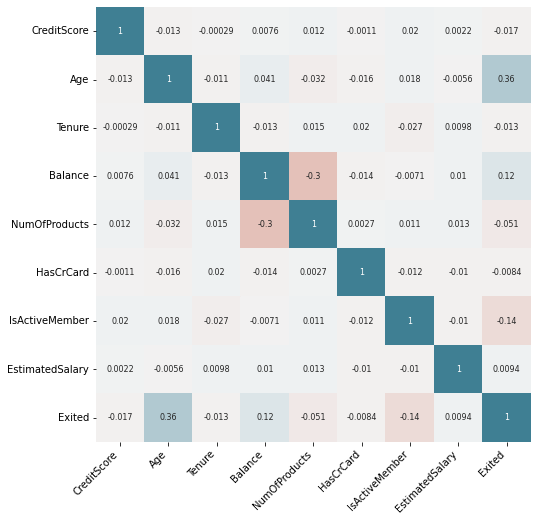

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

No hay correlación significativa entre features.

---
Vemos la correlación con nuestro target


In [179]:
correlation = df.corr()
print(correlation['Exited'].sort_values(ascending=False))

Exited             1.000000
Age                0.358378
Balance            0.116627
EstimatedSalary    0.009405
HasCrCard         -0.008355
Tenure            -0.013226
CreditScore       -0.016979
NumOfProducts     -0.050845
IsActiveMember    -0.143182
Name: Exited, dtype: float64


## Feature Engineering


In [180]:
#tratamos las variables categoricas
df['Geography'] = df['Geography'].map({'France': 1, 'Spain': 2, 
                                 'Germany': 3})

In [181]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':2})

In [182]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,850,2,2,43,2,125510.82,1,1,1,79084.10,0


Balanceamos nuestro target

In [183]:
df['Exited'].value_counts(normalize=True)

0    0.797445
1    0.202555
Name: Exited, dtype: float64

En este caso he desidido optar por downsampling para no tener la mitad de los datos sinteticos.

In [184]:
# separamos datos de los clientes que se han ido y los que no:
exited = df[df['Exited'] == 1]
no_exited  = df[df['Exited'] == 0]
print(exited.shape)
print(no_exited.shape)

(1950, 11)
(7677, 11)


In [185]:
from sklearn.utils import resample

no_exited_downsample = resample(no_exited,
             replace=True,
             n_samples=len(exited),
             random_state=42)

print(no_exited_downsample.shape)

(1950, 11)


In [186]:
# Combinamos dos dataframes :
df_upsampled = pd.concat([exited, no_exited_downsample])

# Mostramos nuevo recuento de clases
df_upsampled.Exited.value_counts()

1    1950
0    1950
Name: Exited, dtype: int64

In [187]:
df_upsampled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.00,1,1,1,101348.88,1
2,502,1,2,42,8,159660.80,3,1,0,113931.57,1
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
16,653,3,1,58,1,132602.88,1,1,0,5097.67,1
22,510,2,2,38,4,0.00,1,1,0,118913.53,1
...,...,...,...,...,...,...,...,...,...,...,...
9297,737,1,1,30,8,174356.13,1,0,0,31928.50,0
5843,710,1,1,21,4,109130.96,2,1,1,56191.99,0
50,698,3,1,44,10,116363.37,2,1,0,198059.16,0
5195,850,2,1,38,2,94652.04,1,1,1,171960.76,0


## Dividimos nuestro dataset en train y test

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X = df_upsampled.drop(['Exited'], axis=1)

In [190]:
y = df_upsampled['Exited']

In [191]:
print(X.shape) #comprobamos las dimensiones
print(y.shape)

(3900, 10)
(3900,)


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

stratify garantiza que durante la partición aleatoria se mantendrá el procentaje de muestras para cada valor de nuetro target.  
Muy importante en primer lugar para sets pequeños  
Comprobamoslo:

##Machine Learning

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##Regresión logística

In [194]:
log_reg = LogisticRegression()

In [195]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [196]:
y_predict_log_reg = log_reg.predict(X_train)

In [197]:
# calculamos el accuracy comparando los datos predichos con los de validación
print('Accuracy: ', accuracy_score(y_train, y_predict_log_reg))
print('ROC: ',roc_auc_score(y_train,y_predict_log_reg))
print('F1: ', f1_score(y_train, y_predict_log_reg))

Accuracy:  0.5644230769230769
ROC:  0.5652515206312675
F1:  0.5880569869657472


##Decision Tree

In [198]:
dec_trees = DecisionTreeClassifier()

In [199]:
dec_trees.fit(X_train, y_train)

DecisionTreeClassifier()

In [200]:
dec_trees.score(X_train, y_train)

1.0

In [201]:
dec_trees.score(X_test, y_test)

0.7038461538461539

Vemos un claro caso de sobreajuste en el modelo de Decision Tree.
Y también podemos decir lo mismo en el caso de RandomForest, que mostraba muy buenos resultados en el train, pero en test el rendimiento baja considerablemente.


---

Vamos a ajustar los hiperparametros de dichos modelos para intentar mejorar su rendimiento

In [202]:
max_depth_values = range(1,100)


In [203]:
scores_data = pd.DataFrame()

In [204]:
for max_depth in max_depth_values:
  clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_scor = clf.score(X_test, y_test)
  

  temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_scor':[test_scor]})
  scores_data = scores_data.append(temp_score_data)

In [205]:
scores_data.sort_values('test_scor', ascending=False).head()

,max_depth,train_score,test_scor
0,6,0.797115,0.757692
0,5,0.783333,0.751282
0,4,0.766987,0.738462
0,7,0.818269,0.738462
0,40,1.000000,0.735897


In [206]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_scor'], var_name = 'set_type', value_name='score' )

In [207]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.705769
1,2,train_score,0.733013
2,3,train_score,0.733013
3,4,train_score,0.766987
4,5,train_score,0.783333
...,...,...,...
193,95,test_scor,0.717949
194,96,test_scor,0.711538
195,97,test_scor,0.710256
196,98,test_scor,0.708974


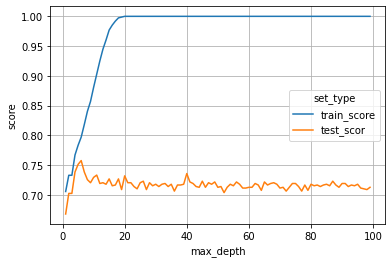

In [208]:

sns.lineplot(x='max_depth', y='score', hue= 'set_type', data=scores_data_long)
plt.grid()

!!! Aquí da igual vamos a tener el problema de overfitting ya que el modelo ha hecho 100 iteraciones sobre el mismo dataset.

---

Para evitarlo podemos usar cross validation

In [209]:
from sklearn.model_selection import cross_val_score

In [210]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [211]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7810897435897436

Agregamos nuestra cross validacion a nuestra iteracion anterior:

In [212]:
for max_depth in max_depth_values:
  clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_scor = clf.score(X_test, y_test)
  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_scor':[test_scor], 'mean_cross_val_score':[mean_cross_val_score]})
  scores_data = scores_data.append(temp_score_data)

In [213]:
scores_data.sort_values('mean_cross_val_score', ascending=False).head()

,max_depth,train_score,test_scor,mean_cross_val_score
0,6,0.797115,0.756410,0.781090
0,7,0.818269,0.738462,0.770192
0,5,0.783333,0.751282,0.768269
0,8,0.840385,0.725641,0.761538
0,4,0.766987,0.738462,0.756731


In [214]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_scor', 'mean_cross_val_score'], var_name = 'set_type', value_name='score' )

In [215]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.705769
1,2,train_score,0.733013
2,3,train_score,0.733013
3,4,train_score,0.766987
4,5,train_score,0.783333
...,...,...,...
589,95,mean_cross_val_score,0.732051
590,96,mean_cross_val_score,0.732051
591,97,mean_cross_val_score,0.732692
592,98,mean_cross_val_score,0.729487


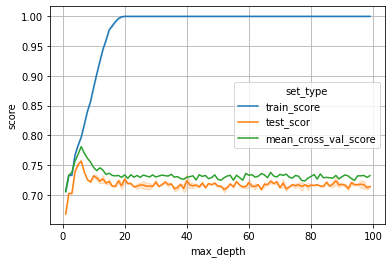

In [216]:

sns.lineplot(x='max_depth', y='score', hue= 'set_type', data=scores_data_long)
plt.grid()

El mejor parametro de la profundidad del árbol no se ha cambiado

In [217]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [218]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7307692307692308

In [219]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [220]:
y_test_predict_dt = best_clf.predict(X_test)

In [221]:
print('Accuracy: ', accuracy_score(y_test, y_test_predict_dt))
print('ROC: ',roc_auc_score(y_test,y_test_predict_dt))
print('F1: ', f1_score(y_test, y_test_predict_dt))
print()

Accuracy:  0.7564102564102564
ROC:  0.757350032959789
F1:  0.7613065326633166



In [222]:
confusion_matrix(y_test, y_test_predict_dt)

array([[287,  83],
       [107, 303]])

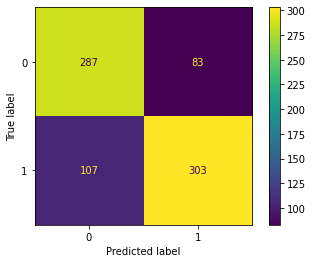

In [223]:
conf_matr = confusion_matrix(y_test, y_test_predict_dt, labels=best_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=best_clf.classes_)
disp.plot()
plt.show()

De esa manera con la ayuda de cross validation hemos resuelto el problema de overfitting del modelo de Decision Tree, hemos encontrado el mejor valor de hiperparametro max_depth (la profundidad del arbol) y hemos obtenido la mejor precisión de 73%.  


###Optimizamos los hiperparámetros con GridSearchCV

In [224]:
clf = DecisionTreeClassifier() #reescribimos el clasificator sin parametros

In [225]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(1,30), }

In [226]:
grid_search_cv_dtree = GridSearchCV(clf, parameters, cv=5)

In [227]:
grid_search_cv_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [228]:
grid_search_cv_dtree.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [229]:
best_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [230]:
best_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

                        0
Age              0.398113
NumOfProducts    0.302014
Balance          0.154054
IsActiveMember   0.049392
Geography        0.042876
Gender           0.018101
Tenure           0.013478
EstimatedSalary  0.012060
CreditScore      0.009910
HasCrCard        0.000000


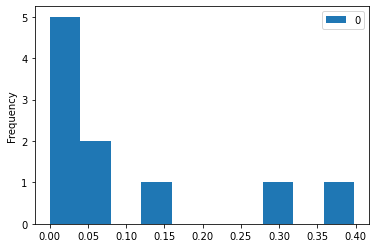

In [231]:
feature_importance = pd.DataFrame(best_dtree.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(by=0, ascending=False)[:10])
feature_importance.plot(kind='hist')

Como vemos hay 2 variables que apenas aportan valor al modelo

In [232]:
X_train_drop = X_train.drop(['HasCrCard','CreditScore'], axis=1)

In [233]:
X_test_drop = X_test.drop(['HasCrCard','CreditScore'], axis=1)

In [234]:
best_dtree.fit(X_train_drop, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [235]:
y_predict_best_dtree = best_dtree.predict(X_test_drop)

In [236]:
print('Accuracy: ', accuracy_score(y_test, y_predict_best_dtree))
print('ROC: ',roc_auc_score(y_test,y_predict_best_dtree))
print('F1: ', f1_score(y_test, y_predict_best_dtree))
print()

Accuracy:  0.7564102564102564
ROC:  0.757350032959789
F1:  0.7613065326633166



In [237]:
confusion_matrix(y_test, y_predict_best_dtree)

array([[287,  83],
       [107, 303]])

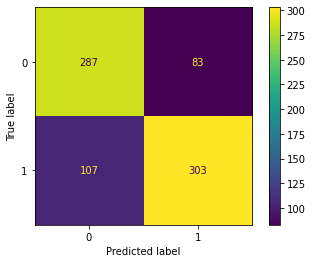

In [238]:
conf_matr = confusion_matrix(y_test, y_test_predict_dt, labels=best_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=best_clf.classes_)
disp.plot()
plt.show()

##Random forest

In [239]:
param_grid = {'n_estimators': [30, 50, 80, 120],
              'max_features': [3, 5, 7, 9, 10],
              'max_depth'   : [None, 3, 5, 7, 10],
              'criterion'   : ['gini', 'entropy']}

In [240]:
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 42),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'max_features': [3, 5, 7, 9, 10],
                         'n_estimators': [30, 50, 80, 120]},
             return_train_score=True, scoring='accuracy')

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

In [ ]:
rf_optim = RandomForestClassifier(criterion='entropy', max_depth = 10, max_features=3,
                                  n_estimators= 80)

In [ ]:
rf_optim.fit(X_train, y_train)

In [ ]:
y_test_predict_rf = rf_optim.predict(X_test)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_test_predict_rf))
print('ROC: ',roc_auc_score(y_test,y_test_predict_rf))
print('F1: ', f1_score(y_test, y_test_predict_rf))
print()

In [ ]:
confusion_matrix(y_test, y_test_predict_rf)

In [ ]:
conf_matr = confusion_matrix(y_test, y_test_predict_rf, labels=rf_optim.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=rf_optim.classes_)
disp.plot()
plt.show()

## Redes neuronales

In [ ]:

from tensorflow import keras
from keras import layers
from keras import models
from keras.layers import BatchNormalization

Preparamos los datos

In [ ]:
df_upsampled.head(10)

In [ ]:
X = df_upsampled.drop('Exited', axis=1)

In [ ]:
X

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

X_norm = pd.DataFrame(normalized_data, columns=X.columns)

In [ ]:
X_norm

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, 
                    y_train,
                    epochs=200, 
                    batch_size=512, 
                    validation_data=(X_test, y_test))

In [ ]:
model.summary()

In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
model_loss.plot (figsize = (12,8))
plt.grid()

In [ ]:
acc = model.evaluate(X_test,y_test)[1]
print(f'Accuracy of model is {acc}')

In [262]:
y_predicted =model.predict(X_test)
y_predicted = [1 if y>=0.5 else 0 for y in y_predicted] 
df = pd.DataFrame({"y_test": y_test , "y_predicted" : y_predicted})
df.head(15)

25/25 [==============================] - 0s 1ms/step


,y_test,y_predicted
4182,1,1
8657,1,0
1572,1,1
1146,0,0
7354,0,0
1847,1,0
5496,0,0
8837,1,1
9422,0,0
5452,1,1
